# Titanic Final Project


Members: Joel Haupt, Miquel Sugrañes, Saurabh Nagarkar, Hajar Laccheb
--

**MAI - Master in Artificial Intelligence**

**Computational Intelligence - 2022/2023**

----

This _python_ Notebook contains all the code necessary to run the different experiments explained in the report with which it comes.

In order to run experimens data must be retrieved (it is also attached as part of the project's delivery) and saved into Google Drive, specifying the right path, which can be set below by the user.

Notice that the number of epochs for the training of the MLP models can be set by the user by changing them in the desired case.

----


## Imports and preprocessing

In [ ]:
# Mount Google Drive session
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries and data

In [ ]:
# Import necessary libraries
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

In [ ]:
# Set data path
data_path = '/content/drive/MyDrive/Master/CI/titanic_dataset'
train_data_path = os.path.join(data_path, 'train.csv')
test_data_path = os.path.join(data_path, 'test.csv')

In [ ]:
# Import data and store them in a pandas DataFrame
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

### Preprocessing

In [ ]:
# Show first 5 rows of training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Show training data shape
train_data.shape

(891, 12)

In [ ]:
# Show training data decription
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Show training data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Select indices for instances to be deleted and print them
indices1 = train_data[train_data['Embarked'].isnull()].index.tolist()
indices2 = train_data[train_data['Age'].isnull()].index.tolist()
train_indices_to_delete = sorted(indices1 + indices2)
print(train_indices_to_delete)

[5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 61, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 829, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]


In [ ]:
# Show first 5 rows of test data 
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Show test data shape
test_data.shape

(418, 11)

In [ ]:
# Show test data description
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Show test data information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Delete selected instances from train data
train_data_df = train_data.drop(train_indices_to_delete)

In [ ]:
# Store original test data into a different dataframe to perform preprocessing
test_data_df = test_data

In [ ]:
# Deal with missing values using Expectation Maximization
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Create an IterativeImputer object to handle missing values
imputerAge = IterativeImputer()
imputerFare = IterativeImputer()

# Fit the imputer on the "age" column
age = imputerAge.fit_transform(test_data_df[['Age']])
test_data_df[['Age']] = np.round(age,2)

# Fit the imputer on the "fare" column
fare = imputerFare.fit_transform(test_data_df[['Fare']])
test_data_df[['Fare']] = fare

In [ ]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Retrieve social titles from training data feature "Name"
titles = set()
for name in train_data_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Col', 'Mr', 'Jonkheer', 'Don', 'Miss', 'Dr', 'the Countess', 'Mrs', 'Lady', 'Mlle', 'Capt', 'Master', 'Ms', 'Major', 'Rev', 'Sir', 'Mme'}


In [ ]:
# Define dictionary to map title values
title_dictionary = {"Capt": "Officer",
                    "Col": "Officer",
                    "Major": "Officer",
                    "Jonkheer": "Royalty",
                    "Don": "Royalty",
                    "Sir" : "Royalty",
                    "Dr": "Officer",
                    "Rev": "Officer",
                    "the Countess":"Royalty",
                    "Mme": "Mrs",
                    "Mlle": "Miss",
                    "Ms": "Mrs",
                    "Mr" : "Mr",
                    "Mrs" : "Mrs",
                    "Miss" : "Miss",
                    "Master" : "Master",
                    "Lady" : "Royalty"}

In [ ]:
# Map title values retrieved from both tran and test data to title_dictionary
train_data_df['Title'] = train_data_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test_data_df['Title'] = test_data_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_data_df['Title'] = train_data_df.Title.map(title_dictionary)
test_data_df['Title'] = test_data_df.Title.map(title_dictionary)
train_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
# Drop undesired features from train and test dataframes
train_data_df = train_data_df.drop(["Cabin", "Ticket", "Name"], axis=1)
test_data_df = test_data_df.drop(["Cabin", "Ticket", "Name"], axis=1)

Once we have our data sets (in form of dataframes) we proceed to analyse the structure and type of variables that we have, to change data types or to arrange values.

In [ ]:
# Encode categorical variables into numerical ones
train_data_df.Sex=train_data_df.Sex.map({'female':0, 'male':1})
train_data_df.Embarked=train_data_df.Embarked.map({'S':0, 'C':1, 'Q':2})
train_data_df.Title=train_data_df.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})

test_data_df.Sex=test_data_df.Sex.map({'female':0, 'male':1})
test_data_df.Embarked=test_data_df.Embarked.map({'S':0, 'C':1, 'Q':2})
test_data_df.Title = test_data_df.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})

In [ ]:
# Look for the instance with a NaN value in "title"
test_data_df[test_data_df.Title.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1306,1,0,39.0,0,0,108.9,1,NaN


In [ ]:
# Fill missing 'Title' value
test_data_df=test_data_df.fillna(2)

In [ ]:
# Perform min-max scaling
train_data_df.Age = (train_data_df.Age-min(train_data_df.Age))/(max(train_data_df.Age)-min(train_data_df.Age))
train_data_df.Fare = (train_data_df.Fare-min(train_data_df.Fare))/(max(train_data_df.Fare)-min(train_data_df.Fare))

test_data_df.Age = (test_data_df.Age-min(test_data_df.Age))/(max(test_data_df.Age)-min(test_data_df.Age))
test_data_df.Fare = (test_data_df.Fare-min(test_data_df.Fare))/(max(test_data_df.Fare)-min(test_data_df.Fare))

In [ ]:
# Show first 5 rows of train data
train_data_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,0.271174,1,0,0.014151,0,0
1,2,1,1,0,0.472229,1,0,0.139136,1,2
2,3,1,3,0,0.321438,0,0,0.015469,0,1
3,4,1,1,0,0.434531,1,0,0.103644,0,2
4,5,0,3,1,0.434531,0,0,0.015713,0,0


In [ ]:
# Show training data information
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    int64  
 9   Title        712 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 61.2 KB


In [ ]:
# Show training data description
train_data_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,0.367204,0.514045,0.432584,0.067471,0.261236,0.794944
std,258.683191,0.491139,0.836854,0.481420,0.182118,0.930692,0.854181,0.103329,0.521561,1.095998
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,0.246042,0.000000,0.000000,0.015713,0.000000,0.000000
50%,445.000000,0.000000,2.000000,1.000000,0.346569,0.000000,0.000000,0.030539,0.000000,0.000000
75%,677.250000,1.000000,3.000000,1.000000,0.472229,1.000000,1.000000,0.064412,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,1.000000,5.000000,6.000000,1.000000,2.000000,5.000000


In [ ]:
# SHow first 5 rows of test data
test_data_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,0.452723,0,0,0.015282,2,0.0
1,893,3,0,0.617566,1,0,0.013663,0,2.0
2,894,2,1,0.815377,0,0,0.018909,2,0.0
3,895,3,1,0.353818,0,0,0.016908,0,0.0
4,896,3,0,0.287881,1,1,0.023984,0,2.0


In [ ]:
# Show test data information
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [ ]:
# Show test data description
test_data_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,0.396968,0.447368,0.392344,0.069540,0.464115,0.739234
std,120.810458,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993,0.685516,0.997090
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,0.396941,0.000000,0.000000,0.028213,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484,1.000000,1.000000
max,1309.000000,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000,2.000000,4.000000


### Split data into train and validation sets

In [ ]:
# Split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(
    train_data_df.drop(['Survived'], axis=1),
    train_data_df.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=train_data_df.Survived
)

In [ ]:
# Scale data
scaler = StandardScaler()
train_data = scaler.fit_transform(x_train)
validation_data = scaler.transform(x_val)
test_dataset = scaler.transform(test_data_df)

## Train and predict using a Logistic Regression Model

In [ ]:
# Build and train a logistic regression model

clf = LogisticRegression(max_iter=30)
train_history = clf.fit(train_data, y_train)

# Obtain accuracy with validation data predictions

y_pred = clf.predict(validation_data)
accuracy_score(y_val, y_pred)

0.8601398601398601

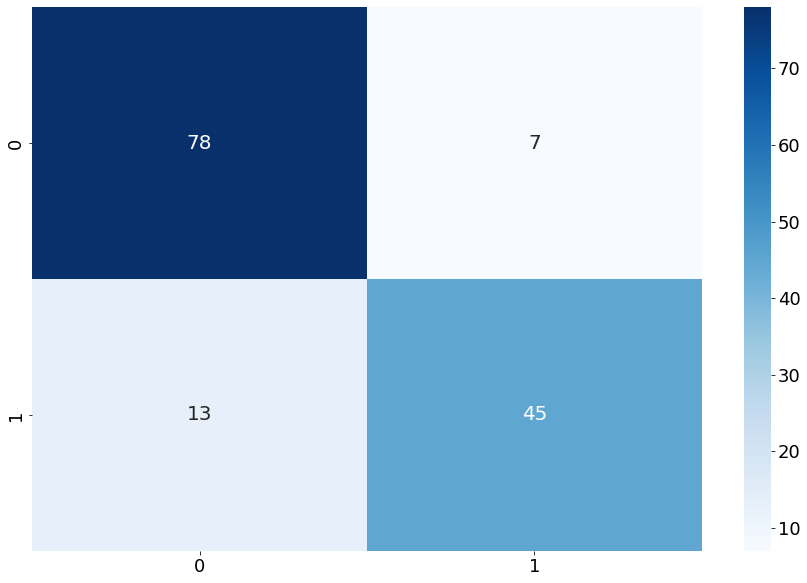

In [ ]:
# Create and plot a confussion matrix with classifcation results
plt.figure(figsize=(15, 10))
cm=confusion_matrix(y_val, y_pred)
sns.heatmap(cm,annot=True, cmap= 'Blues', annot_kws={'size': 20})

## Train and predict using MLP (3 hidden layers)

### Without regularization

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Set font size for all plots to 18
plt.rcParams.update({'font.size': 18})

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(9,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )

Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 0.6353 - accuracy: 0.6538 - val_loss: 0.5453 - val_accuracy: 0.7343
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7329 - val_loss: 0.4805 - val_accuracy: 0.7902
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7838 - val_loss: 0.4305 - val_accuracy: 0.8392
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.8067 - val_loss: 0.3989 - val_accuracy: 0.8741
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8137 - val_loss: 0.3808 - val_accuracy: 0.8811
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8120 - val_loss: 0.3677 - val_accuracy: 0.8671
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8172 - val_loss: 0.3637 - val_accuracy: 0.8671
Epoch 8/50
18/18 [=

In [ ]:
# Obtain training results
train_loss, accuracy, val_loss, val_accuracy = train_history.history['loss'], train_history.history['accuracy'], train_history.history['val_loss'], train_history.history['val_accuracy']

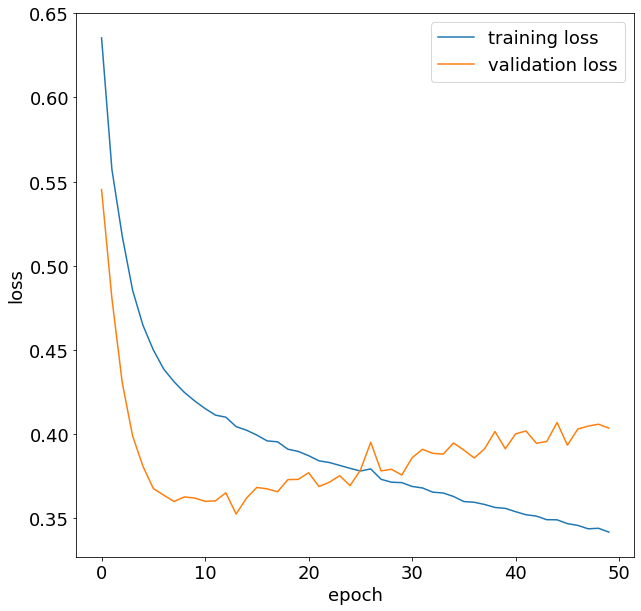

In [ ]:
# Plot training and validation loss results
plt.figure(figsize=(10,10))
plt.plot(train_loss, label = "training loss")
plt.plot(val_loss, label = "validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

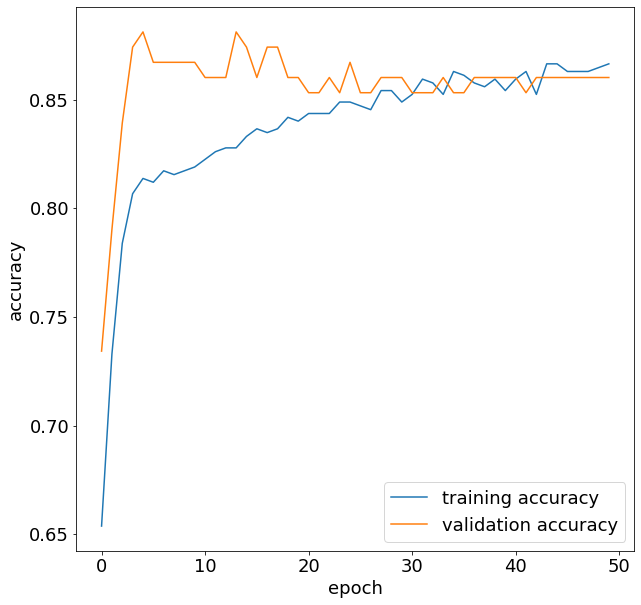

In [ ]:
# Plot training and validation accuracy results
plt.figure(figsize=(10,10))
plt.plot(accuracy, label = "training accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

### With Dropout regularization

In [145]:
# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(9,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()


In [146]:
# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )

Epoch 1/50
18/18 [==============================] - 1s 9ms/step - loss: 0.6687 - accuracy: 0.6134 - val_loss: 0.5618 - val_accuracy: 0.8462
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.6749 - val_loss: 0.5194 - val_accuracy: 0.8601
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.6889 - val_loss: 0.4904 - val_accuracy: 0.8462
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5570 - accuracy: 0.7311 - val_loss: 0.4634 - val_accuracy: 0.8462
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7364 - val_loss: 0.4395 - val_accuracy: 0.8462
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.7346 - val_loss: 0.4248 - val_accuracy: 0.8531
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5309 - accuracy: 0.7680 - val_loss: 0.4087 - val_accuracy: 0.8462
Epoch 8/50
18/18 [==

In [ ]:
# Obtain training results
train_loss, accuracy, val_loss, val_accuracy = train_history.history['loss'], train_history.history['accuracy'], train_history.history['val_loss'], train_history.history['val_accuracy']

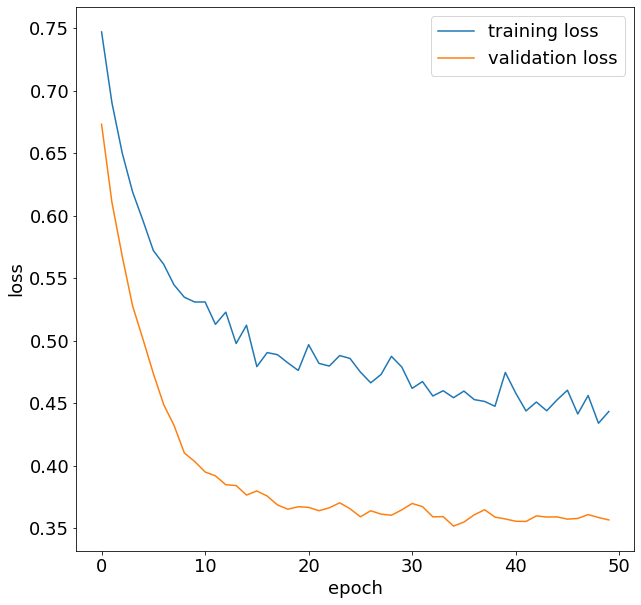

In [ ]:
# Plot training and validation loss results
plt.figure(figsize=(10,10))
plt.plot(train_loss, label = "training loss")
plt.plot(val_loss, label = "validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

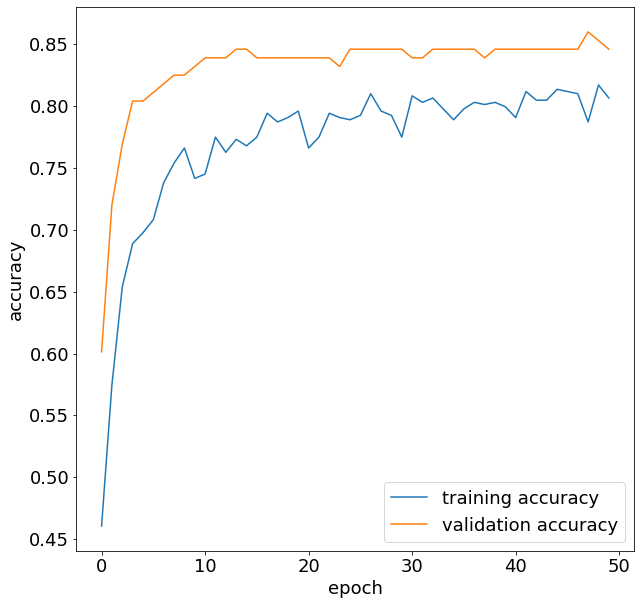

In [ ]:
# Plot training and validation accuracy results
plt.figure(figsize=(10,10))
plt.plot(accuracy, label = "training accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

### With L2 regularization

In [ ]:
from keras.regularizers import l2

# Create a sequential model
model = Sequential()

# Add the first hidden layer with L2 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01), input_dim=9))

# Add the second hidden layer with L2 regularization
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)))

# Add the third hidden layer with L2 regularization
model.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01)))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )


Epoch 1/50
18/18 [==============================] - 1s 9ms/step - loss: 1.0846 - accuracy: 0.5958 - val_loss: 1.0154 - val_accuracy: 0.6014
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0208 - accuracy: 0.5958 - val_loss: 0.9487 - val_accuracy: 0.6014
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9700 - accuracy: 0.5975 - val_loss: 0.8939 - val_accuracy: 0.6084
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9246 - accuracy: 0.6221 - val_loss: 0.8513 - val_accuracy: 0.6503
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.6837 - val_loss: 0.8154 - val_accuracy: 0.6923
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.7206 - val_loss: 0.7857 - val_accuracy: 0.7762
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.8192 - accuracy: 0.7592 - val_loss: 0.7604 - val_accuracy: 0.7762
Epoch 8/50
18/18 [==

In [ ]:
# Obtain training results
train_loss, accuracy, val_loss, val_accuracy = train_history.history['loss'], train_history.history['accuracy'], train_history.history['val_loss'], train_history.history['val_accuracy']

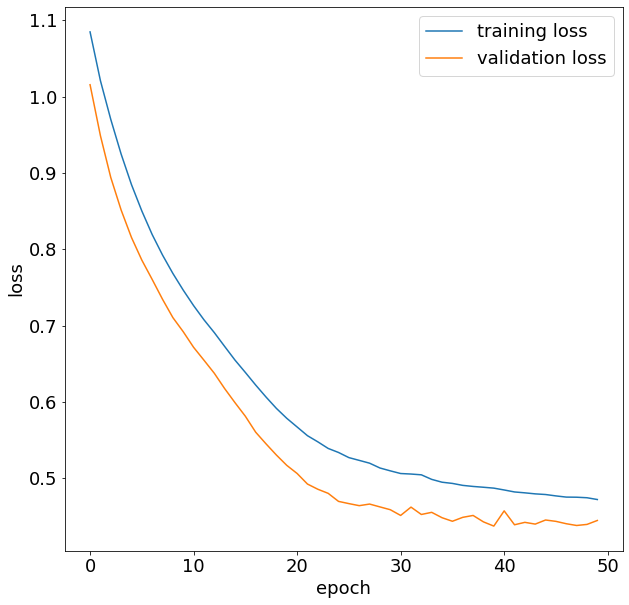

In [ ]:
# Plot training and validation loss results
plt.figure(figsize=(10,10))
plt.plot(train_loss, label = "training loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.plot(val_loss, label = "validation loss")
plt.legend()
plt.show()

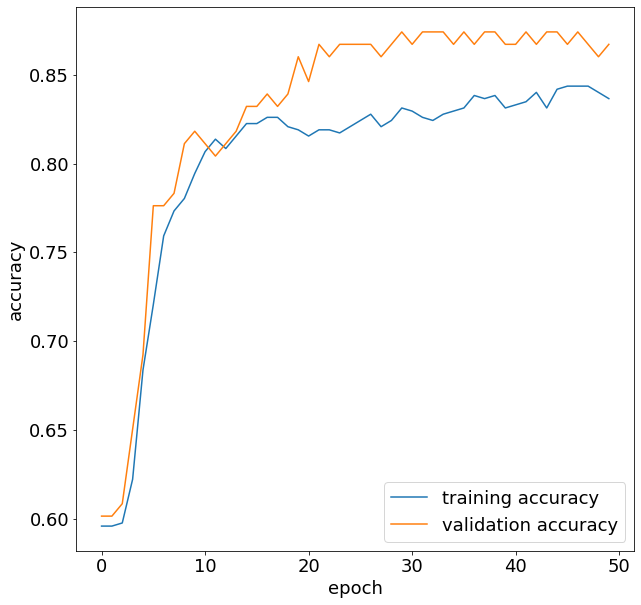

In [ ]:
# Plot training and validation accuracy results
plt.figure(figsize=(10,10))
plt.plot(accuracy, label = "training accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Train and predict using MLP (6 hidden layers)

### Without regularization

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(9,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )

Epoch 1/50
18/18 [==============================] - 1s 10ms/step - loss: 0.6100 - accuracy: 0.7417 - val_loss: 0.4385 - val_accuracy: 0.8671
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4624 - accuracy: 0.7979 - val_loss: 0.3249 - val_accuracy: 0.8741
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8313 - val_loss: 0.3344 - val_accuracy: 0.8671
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8172 - val_loss: 0.3286 - val_accuracy: 0.8671
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8278 - val_loss: 0.3856 - val_accuracy: 0.8392
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.3930 - accuracy: 0.8436 - val_loss: 0.3343 - val_accuracy: 0.8671
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8401 - val_loss: 0.3975 - val_accuracy: 0.8531
Epoch 8/50
18/18 [=

In [ ]:
# Obtain training results
train_loss, accuracy, val_loss, val_accuracy = train_history.history['loss'], train_history.history['accuracy'], train_history.history['val_loss'], train_history.history['val_accuracy']

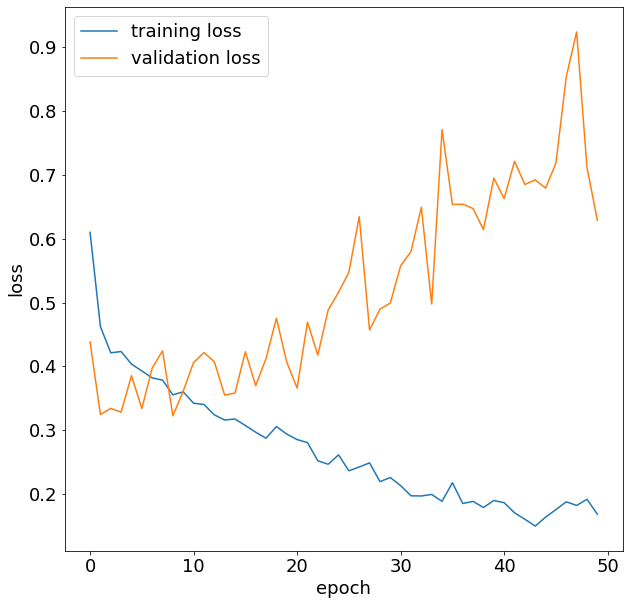

In [ ]:
# Plot training and validation loss results
plt.figure(figsize=(10,10))
plt.plot(train_loss, label = "training loss")
plt.plot(val_loss, label = "validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

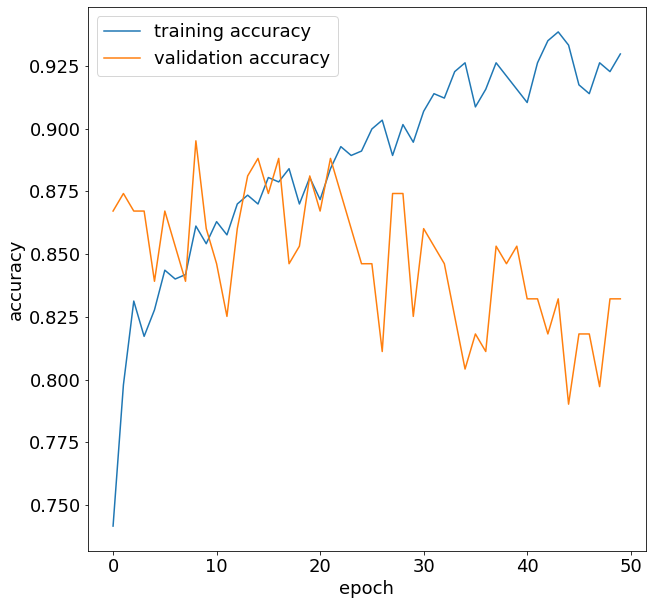

In [ ]:
# Plot training and validation accuracy results
plt.figure(figsize=(10,10))
plt.plot(accuracy, label = "training accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

### With dropout regularization

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(9,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()


In [ ]:
# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )

Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 0.6730 - accuracy: 0.5817 - val_loss: 0.5972 - val_accuracy: 0.7133
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7188 - val_loss: 0.4541 - val_accuracy: 0.8671
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7944 - val_loss: 0.3953 - val_accuracy: 0.8531
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7961 - val_loss: 0.3730 - val_accuracy: 0.8671
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8032 - val_loss: 0.3467 - val_accuracy: 0.8811
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8313 - val_loss: 0.3345 - val_accuracy: 0.8741
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.8225 - val_loss: 0.3508 - val_accuracy: 0.8811
Epoch 8/50
18/18 [=

In [ ]:
# Obtain training results
train_loss, accuracy, val_loss, val_accuracy = train_history.history['loss'], train_history.history['accuracy'], train_history.history['val_loss'], train_history.history['val_accuracy']

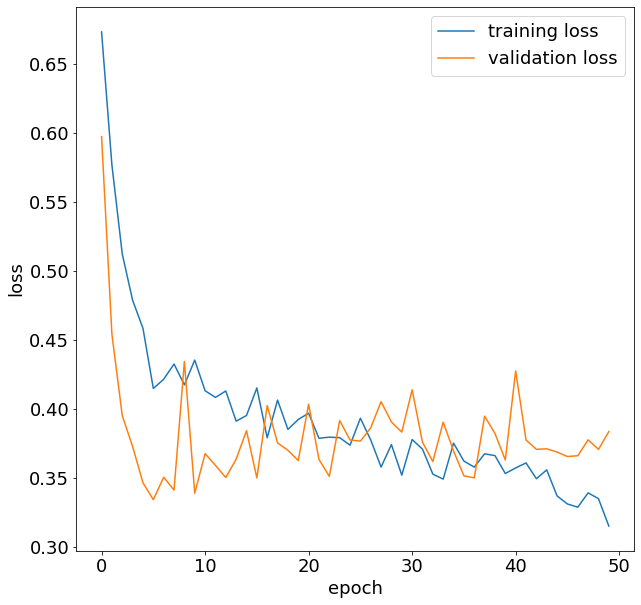

In [ ]:
# Plot training and validation loss results
plt.figure(figsize=(10,10))
plt.plot(train_loss, label = "training loss")
plt.plot(val_loss, label = "validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

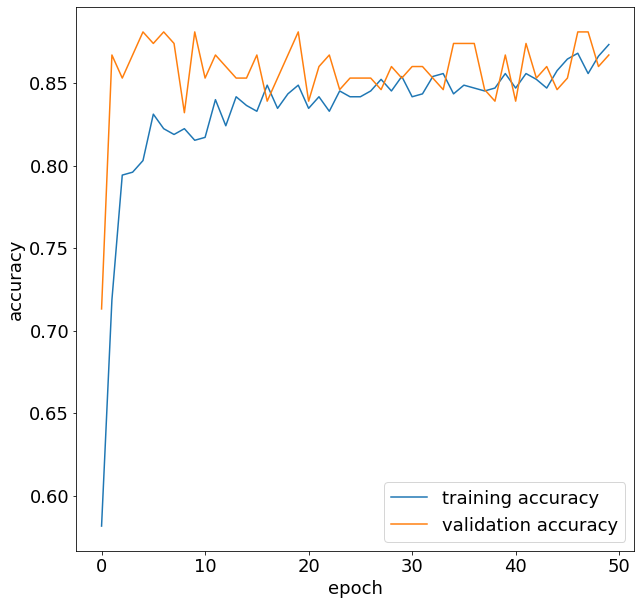

In [ ]:
# Plot training and validation accuracy results
plt.figure(figsize=(10,10))
plt.plot(accuracy, label = "training accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

### With L2 regularization

In [ ]:
from keras.regularizers import l2

# Create a sequential model
model = Sequential()

# Add the first hidden layer with L2 regularization
model.add(Dense(units=256, activation='relu', kernel_regularizer=l2(0.01), input_dim=9))

# Add the second hidden layer with L2 regularization
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))

# Add the second hidden layer with L2 regularization
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))

# Add the second hidden layer with L2 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))

# Add the second hidden layer with L2 regularization
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)))

# Add the third hidden layer with L2 regularization
model.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01)))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )


Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 3.6777 - accuracy: 0.5870 - val_loss: 3.1496 - val_accuracy: 0.5944
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 2.7755 - accuracy: 0.6380 - val_loss: 2.3501 - val_accuracy: 0.7552
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 2.1193 - accuracy: 0.7856 - val_loss: 1.7981 - val_accuracy: 0.8601
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 1.6809 - accuracy: 0.8084 - val_loss: 1.4520 - val_accuracy: 0.8182
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 1.3701 - accuracy: 0.8155 - val_loss: 1.1831 - val_accuracy: 0.8601
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 1.1555 - accuracy: 0.8225 - val_loss: 0.9896 - val_accuracy: 0.8741
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 1.0010 - accuracy: 0.8067 - val_loss: 0.8664 - val_accuracy: 0.8671
Epoch 8/50
18/18 [=

In [ ]:
# Obtain training results
train_loss, accuracy, val_loss, val_accuracy = train_history.history['loss'], train_history.history['accuracy'], train_history.history['val_loss'], train_history.history['val_accuracy']

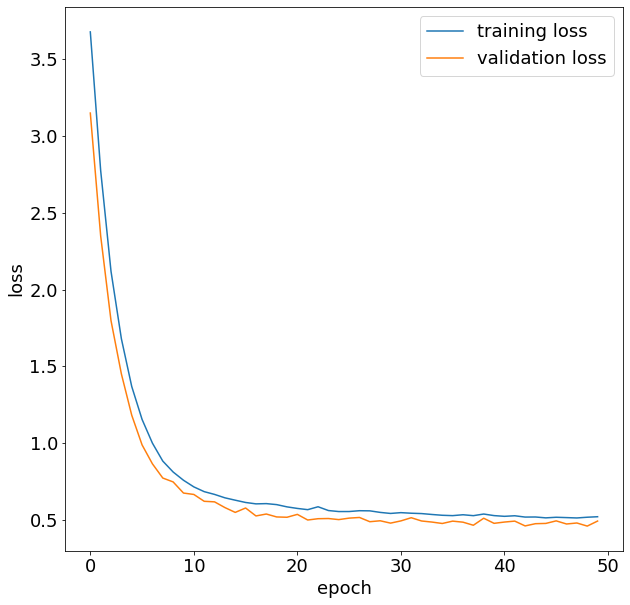

In [ ]:
# Plot training and validation loss results
plt.figure(figsize=(10,10))
plt.plot(train_loss, label = "training loss")
plt.plot(val_loss, label = "validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

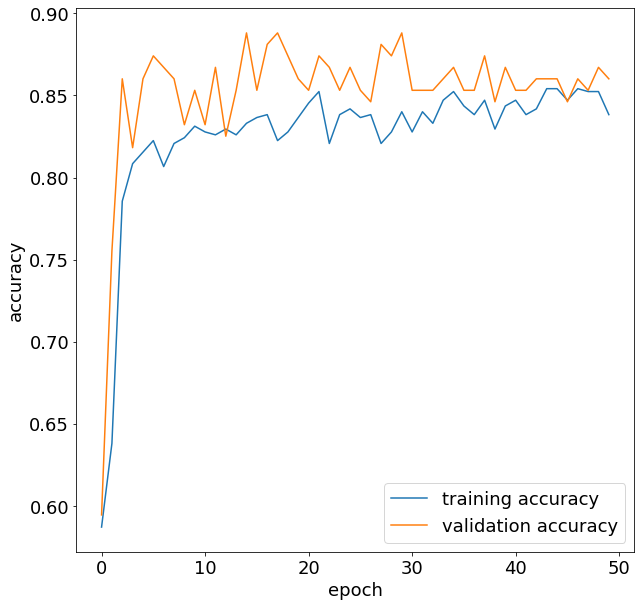

In [ ]:
# Plot training and validation accuracy results
plt.figure(figsize=(10,10))
plt.plot(accuracy, label = "training accuracy")
plt.plot(val_accuracy, label = "validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Predict test data with best model

In [ ]:
# Define best model
# 3 hidden layer model with Dropout regularization
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(9,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )

Epoch 1/50
18/18 [==============================] - 0s 8ms/step - loss: 0.7749 - accuracy: 0.4499 - val_loss: 0.6843 - val_accuracy: 0.5315
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5923 - val_loss: 0.6147 - val_accuracy: 0.7203
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6661 - val_loss: 0.5546 - val_accuracy: 0.7552
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7170 - val_loss: 0.5102 - val_accuracy: 0.8182
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7610 - val_loss: 0.4665 - val_accuracy: 0.8531
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7838 - val_loss: 0.4286 - val_accuracy: 0.8601
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7698 - val_loss: 0.4070 - val_accuracy: 0.8601
Epoch 8/50
18/18 [==

In [ ]:
# Predict outputs for test data
pred = model.predict(test_dataset)

14/14 [==============================] - 0s 1ms/step


In [ ]:
# Convert predictions probabilities into binary array
preds = [1 if p[0] >= 0.5 else 0 for p in pred]

In [ ]:
# Prepare submission data
submission = pd.DataFrame({
        "PassengerId": test_data_df["PassengerId"],
        "Survived": preds
    })
submission.to_csv('submissionDropout.csv', index=False)

In [ ]:
# Define best model
# 3 hidden layer model with L2 regularization
# Create a sequential model
model = Sequential()

# Add the first hidden layer with L2 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01), input_dim=9))

# Add the second hidden layer with L2 regularization
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)))

# Add the third hidden layer with L2 regularization
model.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01)))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_history = model.fit(train_data, y_train, batch_size=32, epochs=50, 
                          validation_data=(validation_data, y_val)
                          )

Epoch 1/50
18/18 [==============================] - 1s 10ms/step - loss: 1.1129 - accuracy: 0.5993 - val_loss: 1.0812 - val_accuracy: 0.6573
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 1.0515 - accuracy: 0.6714 - val_loss: 1.0107 - val_accuracy: 0.7972
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9888 - accuracy: 0.7487 - val_loss: 0.9407 - val_accuracy: 0.8322
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9306 - accuracy: 0.7522 - val_loss: 0.8758 - val_accuracy: 0.8252
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.7645 - val_loss: 0.8159 - val_accuracy: 0.8322
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.7645 - val_loss: 0.7536 - val_accuracy: 0.8322
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.7803 - val_loss: 0.6928 - val_accuracy: 0.8531
Epoch 8/50
18/18 [=

In [ ]:
# Predict outputs for test data
pred = model.predict(test_dataset)

14/14 [==============================] - 0s 1ms/step


In [ ]:
# Convert predictions probabilities into binary array
preds = [1 if p[0] >= 0.5 else 0 for p in pred]

In [ ]:
# Prepare submission data
submission = pd.DataFrame({
        "PassengerId": test_data_df["PassengerId"],
        "Survived": preds
    })
submission.to_csv('submissionL2.csv', index=False)